In [130]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# Importing the Data

In [131]:
data = pd.read_csv('Carseats.csv')

In [132]:
display(data.head()), data.shape

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(None, (400, 11))

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Preprocessing`

In [134]:
df = data.copy()

In [135]:
# Identify and drop our target variable 'Sales' from dataframe, isolating our independent variables
X = df.drop('Sales', axis = 1)

# Isolate our dependent variable as a feature
y = df.Sales

In [136]:
# Train Test Split (70/30 size), drop duplicates and missing values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 33)

X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

# Numeric Data

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 11 to 20
Data columns (total 10 columns):
CompPrice      280 non-null int64
Income         280 non-null int64
Advertising    280 non-null int64
Population     280 non-null int64
Price          280 non-null int64
ShelveLoc      280 non-null object
Age            280 non-null int64
Education      280 non-null int64
Urban          280 non-null object
US             280 non-null object
dtypes: int64(7), object(3)
memory usage: 24.1+ KB


In [138]:
# Select all data excluding 'object' to isolate numeric data
X_train_numeric = X_train.select_dtypes(exclude = 'object')

# Set numeric dataframe columns
X_numeric_cols = X_train_numeric.columns
X_train_numeric.columns = X_numeric_cols

In [139]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 11 to 20
Data columns (total 7 columns):
CompPrice      280 non-null int64
Income         280 non-null int64
Advertising    280 non-null int64
Population     280 non-null int64
Price          280 non-null int64
Age            280 non-null int64
Education      280 non-null int64
dtypes: int64(7)
memory usage: 17.5 KB


In [140]:
X_train_numeric.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
11,117,94,4,503,94,50,13
214,115,115,3,48,107,73,18
361,131,25,10,183,104,56,15
98,122,77,24,382,127,36,16
358,123,96,10,71,118,69,11


In [141]:
# Perform standard scaling on our numeric data

from sklearn.preprocessing import StandardScaler
from scipy import stats

# Instantiate a standard scaler object
ss = StandardScaler()

# Fit and transform our numeric data to the ss object
X_train_numeric = pd.DataFrame(ss.fit_transform(X_train_numeric))
X_train_numeric.set_index(X_train.index, inplace = True)

X_train_numeric.columns = X_numeric_cols
X_train_numeric.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
11,-0.519682,0.865873,-0.413823,1.619408,-0.952591,-0.180258,-0.386274
214,-0.648968,1.614819,-0.562949,-1.456166,-0.391427,1.260019,1.504576
361,0.385317,-1.594949,0.480930,-0.543633,-0.520926,0.195466,0.370066
98,-0.196468,0.259584,2.568687,0.801508,0.471902,-1.056948,0.748236
358,-0.131825,0.937202,0.480930,-1.300697,0.083404,1.009536,-1.142613


In [142]:
# Remove Outliers (2.5 standard deviations from the mean)
X_train_numeric = X_train_numeric[(np.abs(stats.zscore(X_train_numeric)) < 2.5).all(axis = 1)]

# Categorical Data

In [143]:
# Select only categorical data types
X_train_cat = X_train.select_dtypes(include = 'object')
X_train_cat.head()

,ShelveLoc,Urban,US
11,Good,Yes,Yes
214,Medium,Yes,Yes
361,Medium,No,Yes
98,Good,No,Yes
358,Bad,Yes,Yes


In [144]:
# Utilize LabelBinarizer to deal with binary data
# Will convert features with binary values to integer values of 0 or 1
from sklearn.preprocessing import LabelBinarizer

# Create a binarizer object for each binary categorical variable
urban_bin = LabelBinarizer()
us_bin = LabelBinarizer()

# Fit and transform each respective binary cat variable to their respective binarizer objects
X_train_cat.Urban = urban_bin.fit_transform(X_train_cat.Urban)
X_train_cat.US = us_bin.fit_transform(X_train_cat.US)

X_train_cat.head()

,ShelveLoc,Urban,US
11,Good,1,1
214,Medium,1,1
361,Medium,0,1
98,Good,0,1
358,Bad,1,1


In [145]:
# Use pd.get_dummies to create new binary features and drop_first to ensure there is no autocorrelation

X_cat_prepped = X_train_cat.merge(pd.get_dummies(X_train_cat.ShelveLoc, drop_first = True),
                                  left_index = True, right_index =True)
X_cat_prepped.drop('ShelveLoc', axis = 1, inplace = True)
X_cat_prepped.head()

,Urban,US,Good,Medium
11,1,1,1,0
214,1,1,0,1
361,0,1,0,1
98,0,1,1,0
358,1,1,0,0


In [146]:
# Merge numerical data and categorical data
X_train_prep = pd.merge(X_cat_prepped, X_train_numeric, left_index = True, right_index = True)
X_train_prep.head()

,Urban,US,Good,Medium,CompPrice,Income,Advertising,Population,Price,Age,Education
11,1,1,1,0,-0.519682,0.865873,-0.413823,1.619408,-0.952591,-0.180258,-0.386274
214,1,1,0,1,-0.648968,1.614819,-0.562949,-1.456166,-0.391427,1.260019,1.504576
361,0,1,0,1,0.385317,-1.594949,0.480930,-0.543633,-0.520926,0.195466,0.370066
358,1,1,0,0,-0.131825,0.937202,0.480930,-1.300697,0.083404,1.009536,-1.142613
54,0,1,0,1,0.579246,1.186850,0.928306,-1.611634,1.205731,1.447881,1.126406


# The Linear Regression Model

In [147]:
# Set y-train to only include entries which correspond with X_train_prep (remove outliers, duplicates, etc.)
y_train = y_train.loc[X_train_prep.index]
# y_train.index == X_train_prep.index

In [148]:
from sklearn.linear_model import LinearRegression

# Instantiate a regression object
lr = LinearRegression()

# fit the training sets to model 
lr.fit(X_train_prep, y_train)

# predict future values
y_hat_train = lr.predict(X_train_prep)
lr.coef_

array([ 0.29829123, -0.12859066,  4.83014216,  1.90440187,  1.44375946,
        0.39068362,  0.79774734,  0.0426009 , -2.25447363, -0.73724968,
       -0.03196893])

In [149]:
from sklearn.metrics import r2_score, mean_squared_error

# Print respective output scores
print(f"r^2: {r2_score(y_train, y_hat_train)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_train, y_hat_train))}")

r^2: 0.8858151903347778
rmse: 0.9568732068018736


# Linear Regression Assumptions

## 1. Residuals are Normally Distributed (Homescedasticity)

In [150]:
residuals = y_hat_train - y_train

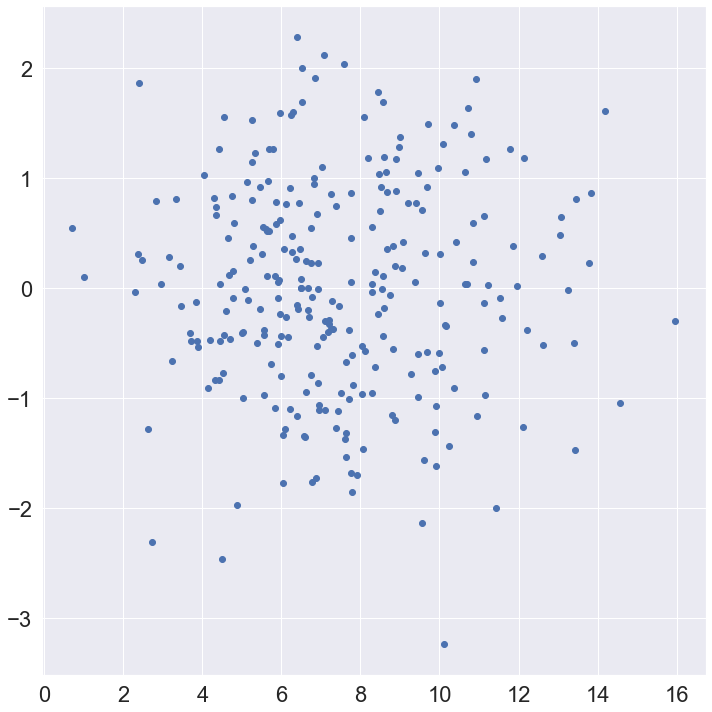

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.scatter(y_hat_train, residuals)
plt.tight_layout()

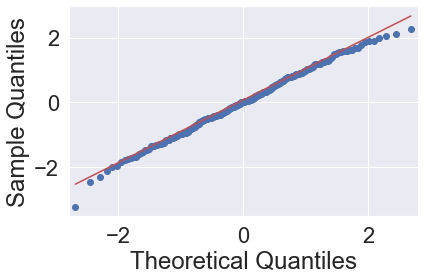

In [152]:
from statsmodels.graphics.gofplots import qqplot

t = qqplot(residuals, line = 'q')
plt.tight_layout()

# Part 2

## Covariance

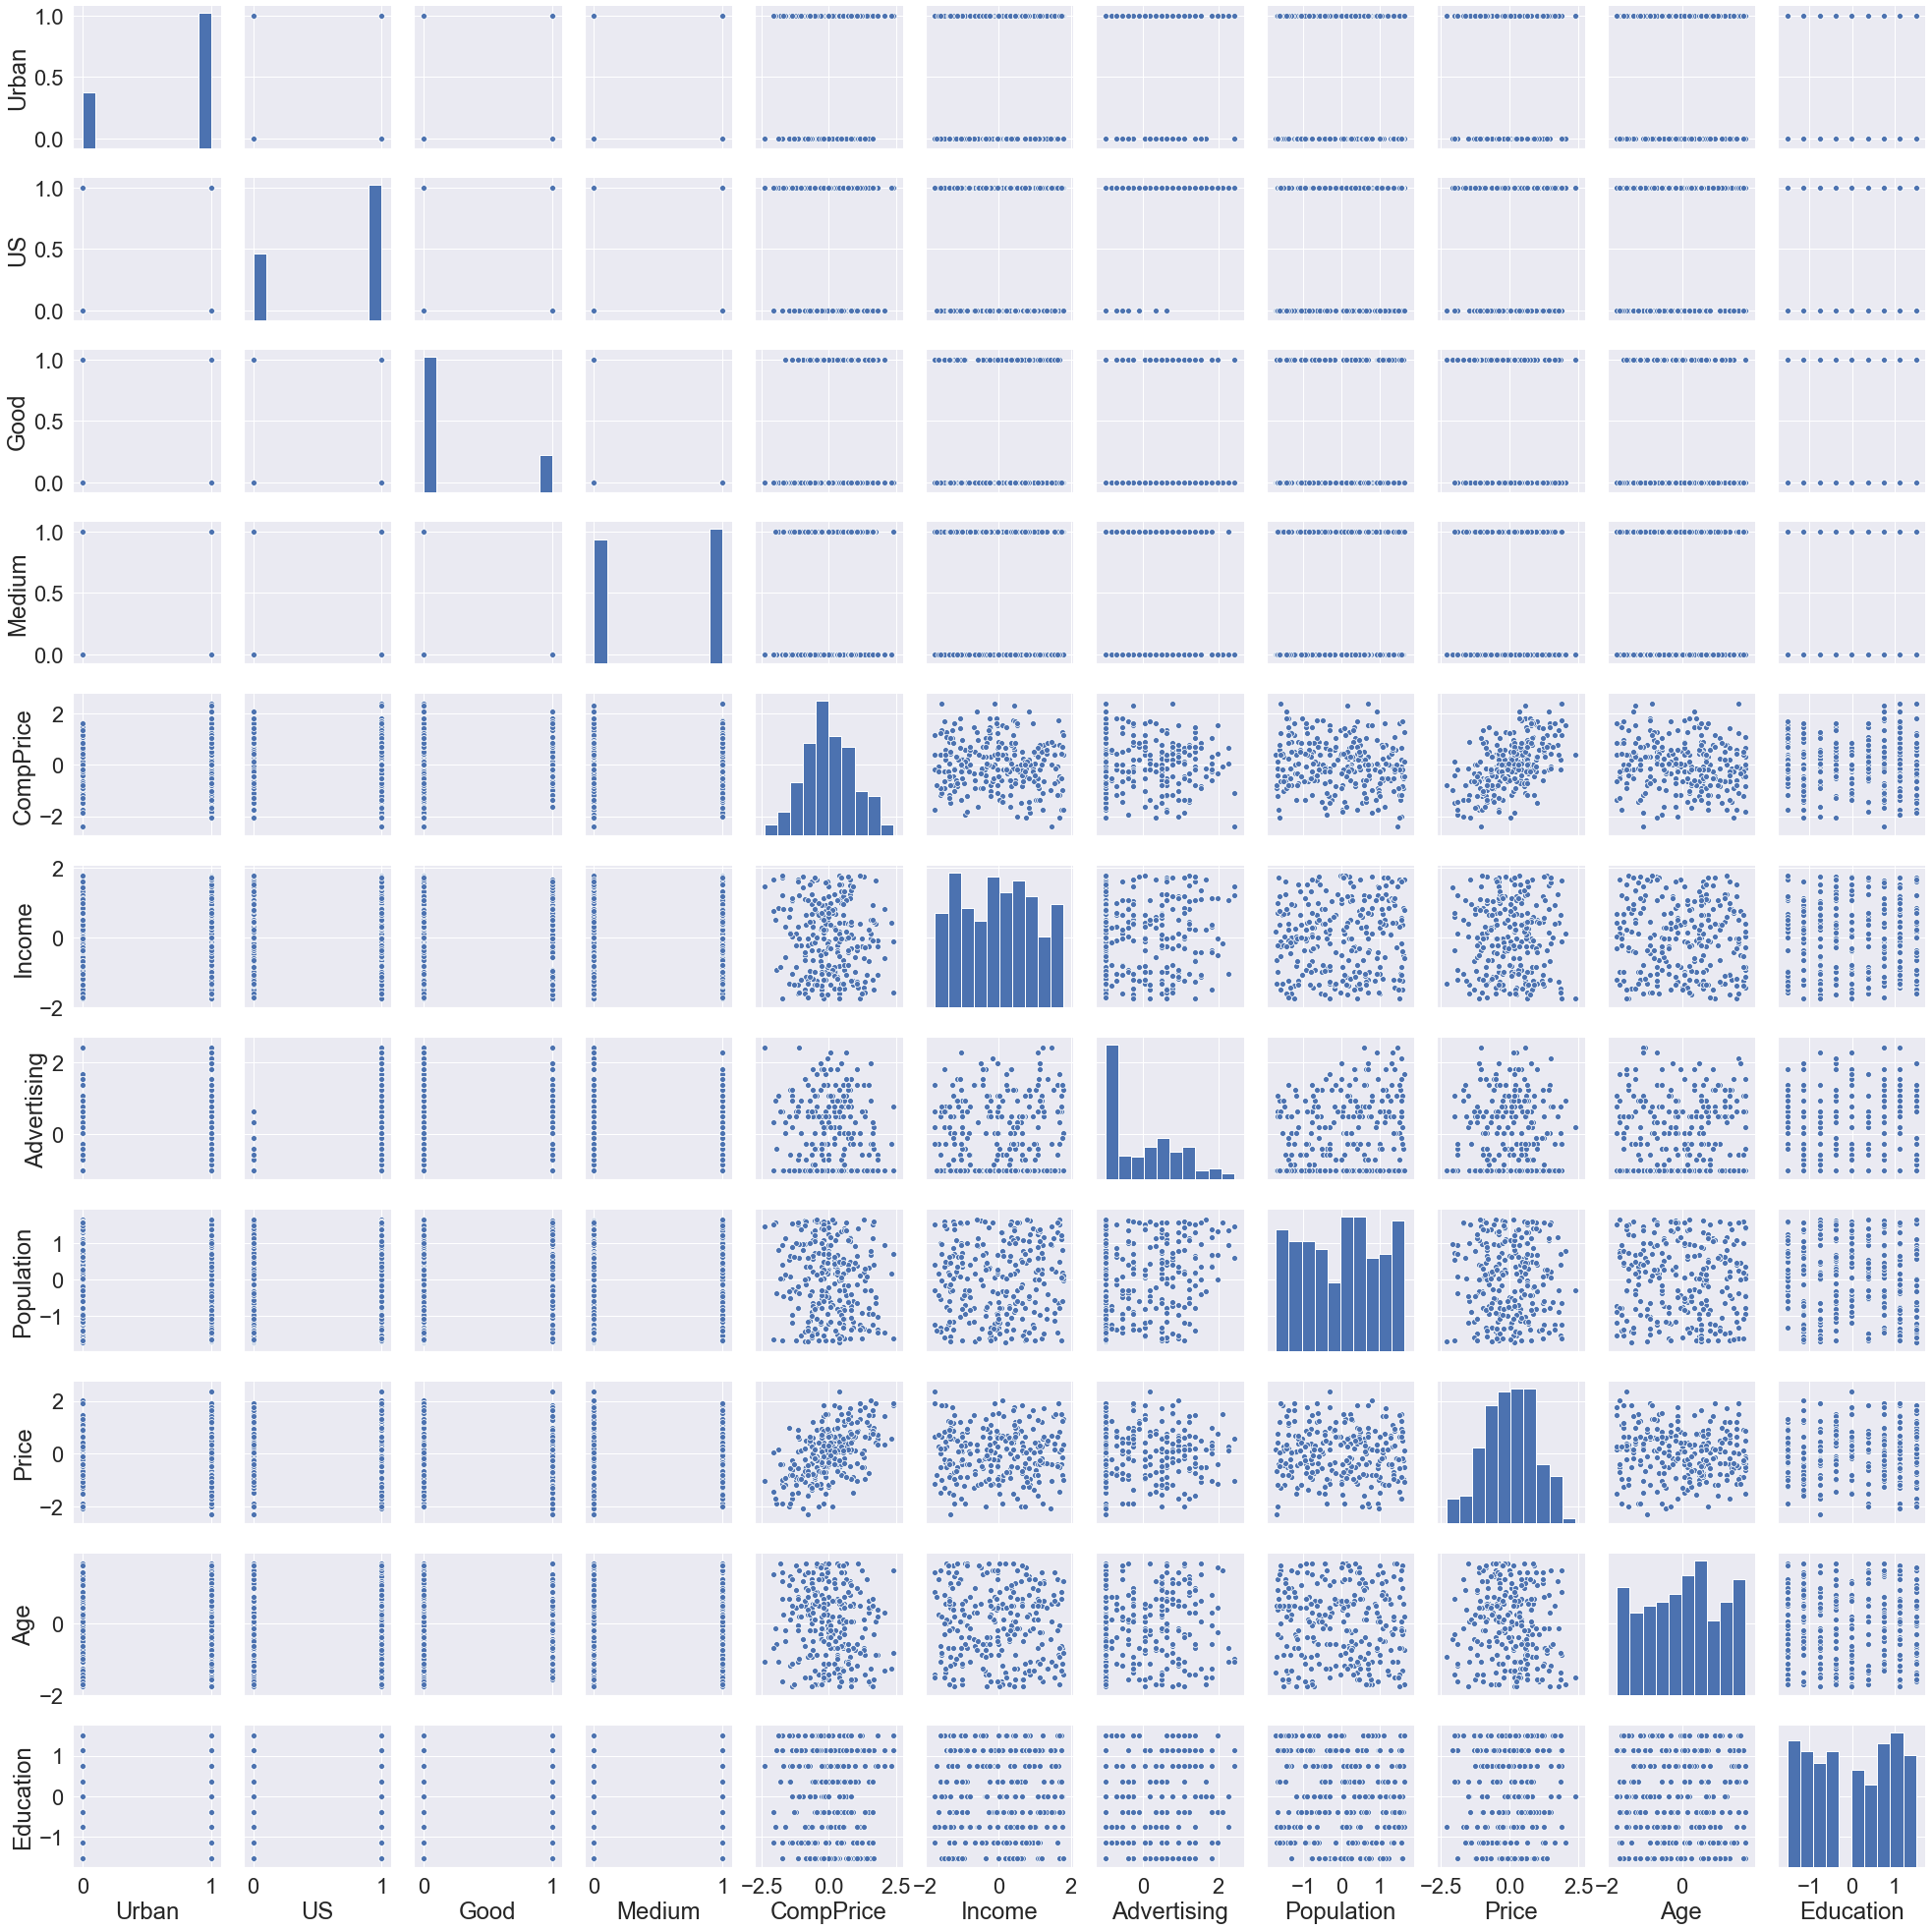

In [106]:
import seaborn as sns
sns.pairplot(X_train_prep.select_dtypes(exclude = 'object'))

In [107]:
X_train_prep.cov()

,Urban,US,Good,Medium,CompPrice,Income,Advertising,Population,Price,Age,Education
Urban,0.207298,0.007612,-0.004045,-0.003321,0.040568,0.020323,0.009927,-0.016719,0.044636,0.024700,-0.019609
US,0.007612,0.221375,0.018696,-0.009977,0.001238,0.038094,0.301661,0.041366,-0.007492,0.000218,-0.060227
Good,-0.004045,0.018696,0.168840,-0.111767,0.027146,-0.007704,0.035925,0.020407,0.010887,-0.002451,0.001401
Medium,-0.003321,-0.009977,-0.111767,0.250513,0.015909,-0.027210,-0.015691,-0.043513,0.006767,0.043082,0.012606
CompPrice,0.040568,0.001238,0.027146,0.015909,0.886988,-0.095025,-0.055005,-0.119792,0.478431,-0.125330,-0.014849
Income,0.020323,0.038094,-0.007704,-0.027210,-0.095025,1.021401,0.073764,0.052228,-0.008790,-0.049898,-0.047055
Advertising,0.009927,0.301661,0.035925,-0.015691,-0.055005,0.073764,0.930377,0.249023,0.002019,-0.014507,-0.015874
Population,-0.016719,0.041366,0.020407,-0.043513,-0.119792,0.052228,0.249023,1.005038,-0.033357,-0.048807,-0.156006
Price,0.044636,-0.007492,0.010887,0.006767,0.478431,-0.008790,0.002019,-0.033357,0.863050,-0.104037,0.001088
Age,0.024700,0.000218,-0.002451,0.043082,-0.125330,-0.049898,-0.014507,-0.048807,-0.104037,1.003598,0.001754


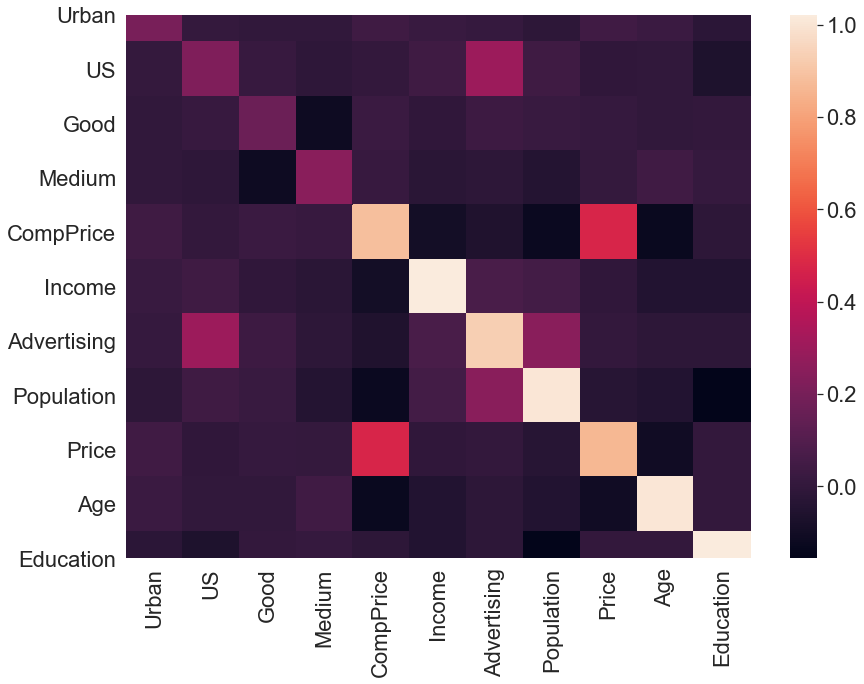

In [108]:
plt.figure(figsize = (14,10))
sns.set(font_scale = 2)
s = sns.heatmap(X_train_prep.cov())


## Dropping 'CompPrice'

In [153]:
X_train_prep.drop('CompPrice', axis = 1, inplace = True)

In [154]:
# Fit second linear regression without 'CompPrice' to see lower score
lr2 = LinearRegression()
lr2.fit(X_train_prep, y_train)
y_hat_train = lr2.predict(X_train_prep)
print(f"R-Squared Score w/o 'CompPrice': {r2_score(y_train, y_hat_train)}")

R-Squared Score w/o 'CompPrice': 0.7343101503747611


## Feature Engineering

In [155]:
X_train_prep.head()

,Urban,US,Good,Medium,Income,Advertising,Population,Price,Age,Education
11,1,1,1,0,0.865873,-0.413823,1.619408,-0.952591,-0.180258,-0.386274
214,1,1,0,1,1.614819,-0.562949,-1.456166,-0.391427,1.260019,1.504576
361,0,1,0,1,-1.594949,0.480930,-0.543633,-0.520926,0.195466,0.370066
358,1,1,0,0,0.937202,0.480930,-1.300697,0.083404,1.009536,-1.142613
54,0,1,0,1,1.186850,0.928306,-1.611634,1.205731,1.447881,1.126406


In [156]:
# Create every possible bivariate combination to be tested for feature engineering
from itertools import combinations

column_list = X_train_prep.columns
interactions = list(combinations(column_list, 2))
interactions

[('Urban', 'US'),
 ('Urban', 'Good'),
 ('Urban', 'Medium'),
 ('Urban', 'Income'),
 ('Urban', 'Advertising'),
 ('Urban', 'Population'),
 ('Urban', 'Price'),
 ('Urban', 'Age'),
 ('Urban', 'Education'),
 ('US', 'Good'),
 ('US', 'Medium'),
 ('US', 'Income'),
 ('US', 'Advertising'),
 ('US', 'Population'),
 ('US', 'Price'),
 ('US', 'Age'),
 ('US', 'Education'),
 ('Good', 'Medium'),
 ('Good', 'Income'),
 ('Good', 'Advertising'),
 ('Good', 'Population'),
 ('Good', 'Price'),
 ('Good', 'Age'),
 ('Good', 'Education'),
 ('Medium', 'Income'),
 ('Medium', 'Advertising'),
 ('Medium', 'Population'),
 ('Medium', 'Price'),
 ('Medium', 'Age'),
 ('Medium', 'Education'),
 ('Income', 'Advertising'),
 ('Income', 'Population'),
 ('Income', 'Price'),
 ('Income', 'Age'),
 ('Income', 'Education'),
 ('Advertising', 'Population'),
 ('Advertising', 'Price'),
 ('Advertising', 'Age'),
 ('Advertising', 'Education'),
 ('Population', 'Price'),
 ('Population', 'Age'),
 ('Population', 'Education'),
 ('Price', 'Age'),
 ('P

In [157]:
interaction_dict = {}
for interaction in interactions:
    X_train_int = X_train_prep
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(X_train_int, y_train)
    interaction_dict[lr3.score(X_train_int, y_train)] = interaction

In [158]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('Advertising', 'Education')
('US', 'Advertising')
('Price', 'Age')
('Urban', 'Price')
('Good', 'Age')


In [163]:
# Add the top two interaction features (which exclude a categorical variable) to existing DF for feature engineered model
X_train_int = X_train_prep
X_train_int['ad_ed'] = X_train_int['Advertising'] * X_train_int['Age']
X_train_int['price_age'] = X_train_int['Price'] * X_train_int['Age']
X_train_int.head()

,Urban,US,Good,Medium,Income,Advertising,Population,Price,Age,Education,int,price_age,ad_ed
11,1,1,1,0,0.865873,-0.413823,1.619408,-0.952591,-0.180258,-0.386274,0.069629,0.171712,0.074595
214,1,1,0,1,1.614819,-0.562949,-1.456166,-0.391427,1.260019,1.504576,1.895794,-0.493205,-0.709326
361,0,1,0,1,-1.594949,0.480930,-0.543633,-0.520926,0.195466,0.370066,0.072335,-0.101823,0.094005
358,1,1,0,0,0.937202,0.480930,-1.300697,0.083404,1.009536,-1.142613,-1.153509,0.084199,0.485516
54,0,1,0,1,1.186850,0.928306,-1.611634,1.205731,1.447881,1.126406,1.630902,1.745755,1.344077


In [164]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y_train)
lr4.score(X_train_int, y_train)

0.7369777361128249

# Validation